In [14]:
import pandas as pd
import seaborn as asn
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# for visualizing locations on maps
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io import shapereader
import geopandas
import shapely

In [6]:
####
# Helper Functions
####

# Visualization function provide by the Open Power System
def visualize(latitudes, longitudes, country, categories=None, eps=0.03):
    # Remove the locations not in Europe
    european_latitude_mask = np.logical_and(latitudes >= 34, latitudes <= 81)
    european_longitude_mask= np.logical_and(longitudes >= -31, longitudes <= 69)
    european_mask = np.logical_and(european_latitude_mask, european_longitude_mask)
    latitudes = latitudes[european_mask]
    longitudes = longitudes[european_mask]
    if categories is not None:
        categories = categories[european_mask]
        
    # Determine the coordinates of boundary locations
    max_lat = latitudes.max()
    min_lat = latitudes.min()

    max_lon = longitudes.max()
    min_lon = longitudes.min()
    
    # Make the area to show a bit larger
    max_lat = max_lat + (max_lat - min_lat) * eps
    min_lat = min_lat - (max_lat - min_lat) * eps
    
    max_lon = max_lon + (max_lon - min_lon) * eps
    min_lon = min_lon - (max_lon - min_lon) * eps
    
    # Get the shape file for visualizing countries
    shp_filename = shapereader.natural_earth('10m', 'cultural', 'admin_0_countries')
    
    df_geo = geopandas.read_file(shp_filename)
    
    polygon = df_geo.loc[df_geo['ADMIN'] == country]['geometry'].values[0]
    # Make sure that polygon is technically multi-part
    # (see https://github.com/SciTools/cartopy/issues/948)
    if type(polygon) == shapely.geometry.polygon.Polygon:
        polygon=[polygon]
    # Make the figure
    figure(num=None, figsize=(8, 6), dpi=100, facecolor='white', edgecolor='k')
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_geometries(polygon, crs=ccrs.PlateCarree(), facecolor='white', edgecolor='0.5', zorder=1)
    ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m', color='black')

    
    # Plot the locations
    if categories is None:
        ax.scatter(longitudes, latitudes, s=1.5, zorder=2, c='#123456')
    else:
        labels = categories.unique()
        for label in labels:
            category_mask = (categories == label)
            latitude_subset = latitudes[category_mask]
            longitude_subset = longitudes[category_mask]
            ax.scatter(longitude_subset, latitude_subset, s=1.5, zorder=2, label=label)
        ax.legend()
        
    
    # Show the figure
    plt.show()

In [2]:
# Load the data
de_plants = "../opsd-renewable_power_plants-2019-04-05/renewable_power_plants_DE.csv"
df = pd.read_csv(de_plants)

C:\Users\kevin\anaconda3\envs\green\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,commissioning_date,decommissioning_date,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,electrical_capacity,voltage_level,tso,dso,...,eeg_id,federal_state,postcode,municipality_code,municipality,address,lat,lon,data_source,comment
0,1901-01-01,NaN,Renewable energy,Hydro,NaN,Run-of-river,0.120,low voltage,TransnetBW,Netze BW GmbH,...,E1084301000ZE000000266944RA000001,Baden-Württemberg,88255.0,8436011.0,Baienfurt,Niederbieger Str.,47.846131,9.664273,TransnetBW,NaN
1,1901-01-01,NaN,Renewable energy,Hydro,NaN,Run-of-river,0.055,low voltage / medium voltage,TransnetBW,Netze BW GmbH,...,E1084301000ZE000000266945RA000001,Baden-Württemberg,88255.0,8436011.0,Baienfurt,Am Sägewerk,47.846131,9.664273,TransnetBW,NaN
2,1901-07-01,NaN,Renewable energy,Hydro,NaN,Run-of-river,0.044,low voltage,TransnetBW,Syna GmbH,...,E11495010000000000060207975500000,Baden-Württemberg,69245.0,NaN,Bammental,Wiesenbacher Str.,49.355539,8.775571,TransnetBW,NaN
3,1901-11-01,NaN,Renewable energy,Hydro,NaN,Run-of-river,0.080,low voltage,TransnetBW,Syna GmbH,...,E11495010000000000060208119100000,Baden-Württemberg,69245.0,8226006.0,Bammental,Hauptstr. 81,49.355539,8.775571,TransnetBW,NaN
4,1904-01-01,NaN,Renewable energy,Hydro,NaN,Run-of-river,0.050,low voltage,TransnetBW,Elektrizitätswerk Ley,...,E10358010000000000000003010400001,Baden-Württemberg,74549.0,NaN,Unterscheffach,Brückenstrasse,49.162694,9.853297,TransnetBW,NaN


In [21]:
df.federal_state.value_counts()

Bayern                                        556937
Baden-Württemberg                             332142
Nordrhein-Westfalen                           268043
Niedersachsen                                 169576
Hessen                                        116609
Rheinland-Pfalz                               103858
Schleswig-Holstein                             51135
Sachsen                                        42612
Brandenburg                                    42460
Sachsen-Anhalt                                 32700
Thüringen                                      31690
Saarland                                       23877
Mecklenburg-Vorpommern                         19740
Berlin                                          7413
Hamburg                                         3663
Bremen                                          2228
Ausschließliche Wirtschaftszone                 1086
German exclusive economic zone (off-shore)       138
Name: federal_state, dtype: int64

In [23]:
df.energy_source_level_2.value_counts()

Solar                 1754275
Wind                    29543
Bioenergy               14873
Hydro                    7134
Other fossil fuels         75
Geothermal                 11
Storage                     1
Name: energy_source_level_2, dtype: int64

In [35]:
hamburg = df.loc[df.federal_state == "Hamburg"]
hamburg.energy_source_level_2.value_counts()

Solar        3545
Wind           72
Bioenergy      45
Hydro           1
Name: energy_source_level_2, dtype: int64

In [36]:
bw = df.loc[df.federal_state == "Baden-Württemberg"]
bw.energy_source_level_2.value_counts()

Solar         327919
Bioenergy       1902
Hydro           1574
Wind             745
Storage            1
Geothermal         1
Name: energy_source_level_2, dtype: int64

In [41]:
test = df.loc[df.energy_source_level_2 == "Hydro"]
lats = np.array(test['lat'])
longs = np.array(test['lon'])
country = "Germany"

C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater_equal
  
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less_equal
  
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':
C:\Users\kevin\anaconda3\envs\green\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


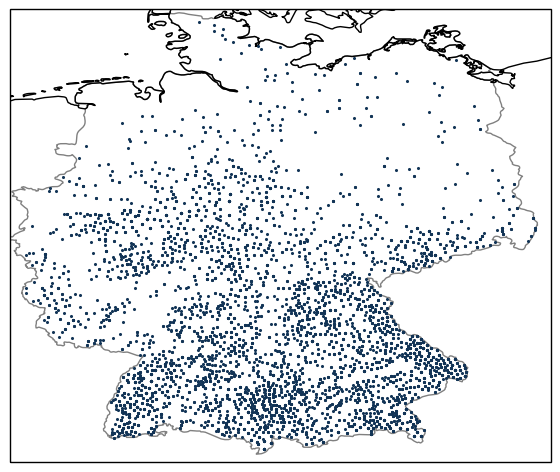

In [42]:
visualize(lats, longs, country)